In [7]:
from sklearn import datasets, model_selection, linear_model, neural_network, preprocessing, model_selection

import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob, os


['tiles/tile99', '0.jpg']
['tiles/tile103', 'RA7.jpg']
['tiles/tile116', 'DEC3.jpg']
['tiles/tile125', 'DEC5.jpg']
['tiles/tile1222.jpg']
['tiles/tile2358.jpg']
['tiles/tile96', 'DEC6.jpg']
['tiles/tile1146.jpg']
['tiles/tile102', 'RA8.jpg']
['tiles/tile1159.jpg']
['tiles/tile121', '0.jpg']
['tiles/tile74', 'RA7.jpg']
['tiles/tile120', '0.jpg']
['tiles/tile71', 'RA7.jpg']
['tiles/tile64', 'DEC5.jpg']
['tiles/tile1359.jpg']
['tiles/tile140', 'RA5.jpg']
['tiles/tile126', 'RA9.jpg']
['tiles/tile2458.jpg']
['tiles/tile1701.jpg']
['tiles/tile97', 'DEC6.jpg']
['tiles/tile80', 'RA1.jpg']
['tiles/tile96', 'DEC4.jpg']
['tiles/tile59', 'DEC9.jpg']
['tiles/tile2432.jpg']
['tiles/tile101', 'DEC3.jpg']
['tiles/tile125', 'DEC2.jpg']
['tiles/tile63', 'DEC4.jpg']
['tiles/tile48', 'RA4.jpg']
['tiles/tile80', 'RA3.jpg']
['tiles/tile82', '0.jpg']
['tiles/tile47', 'DEC6.jpg']
['tiles/tile693.jpg']
['tiles/tile2439.jpg']
['tiles/tile13', 'DEC1.jpg']
['tiles/tile647.jpg']
['tiles/tile30', 'DEC6.jpg']
['tile

['tiles/tile1217.jpg']
['tiles/tile1113.jpg']
['tiles/tile818.jpg']
['tiles/tile1001.jpg']
['tiles/tile1833.jpg']
['tiles/tile1693.jpg']
['tiles/tile186.jpg']
['tiles/tile310.jpg']
['tiles/tile2513.jpg']
['tiles/tile962.jpg']
['tiles/tile91', 'DEC6.jpg']
['tiles/tile22.jpg']
['tiles/tile311.jpg']
['tiles/tile2007.jpg']
['tiles/tile108', 'RA5.jpg']
['tiles/tile1655.jpg']
['tiles/tile2313.jpg']
['tiles/tile60', 'RA6.jpg']
['tiles/tile1123.jpg']
['tiles/tile74', 'RA2.jpg']
['tiles/tile123', 'RA7.jpg']
['tiles/tile88', '0.jpg']
['tiles/tile2536.jpg']
['tiles/tile931.jpg']
['tiles/tile42', 'DEC7.jpg']
['tiles/tile46', 'DEC3.jpg']
['tiles/tile10', 'RA8.jpg']
['tiles/tile583.jpg']
['tiles/tile53', 'RA9.jpg']
['tiles/tile1179.jpg']
['tiles/tile108', 'DEC7.jpg']
['tiles/tile331.jpg']
['tiles/tile1024.jpg']
['tiles/tile115', 'RA2.jpg']
['tiles/tile54', 'DEC5.jpg']
['tiles/tile106', 'DEC5.jpg']
['tiles/tile26', 'DEC6.jpg']
['tiles/tile1196.jpg']
['tiles/tile2286.jpg']
['tiles/tile669.jpg']
['tile

['tiles/tile104', 'DEC6.jpg']
['tiles/tile94', 'RA8.jpg']
['tiles/tile48', 'RA2.jpg']
['tiles/tile104', 'DEC2.jpg']
['tiles/tile8', 'RA9.jpg']
['tiles/tile114', 'RA6.jpg']
['tiles/tile2302.jpg']
['tiles/tile2166.jpg']
['tiles/tile1522.jpg']
['tiles/tile91', 'DEC3.jpg']
['tiles/tile14', '0.jpg']
['tiles/tile45', 'DEC8.jpg']
['tiles/tile1644.jpg']
['tiles/tile5', 'DEC9.jpg']
['tiles/tile2362.jpg']
['tiles/tile435.jpg']
['tiles/tile136', 'RA3.jpg']
['tiles/tile1515.jpg']
['tiles/tile231.jpg']
['tiles/tile1783.jpg']
['tiles/tile467.jpg']
['tiles/tile69', 'RA5.jpg']
['tiles/tile373.jpg']
['tiles/tile695.jpg']
['tiles/tile1505.jpg']
['tiles/tile98', 'RA3.jpg']
['tiles/tile113', 'DEC5.jpg']
['tiles/tile1935.jpg']
['tiles/tile8', 'RA6.jpg']
['tiles/tile1213.jpg']
['tiles/tile2472.jpg']
['tiles/tile516.jpg']
['tiles/tile2057.jpg']
['tiles/tile405.jpg']
['tiles/tile197.jpg']
['tiles/tile141', 'RA9.jpg']
['tiles/tile50', 'RA1.jpg']
['tiles/tile1325.jpg']
['tiles/tile23', 'DEC9.jpg']
['tiles/tile5

['tiles/tile1589.jpg']
['tiles/tile77', 'RA4.jpg']
['tiles/tile128', 'RA7.jpg']
['tiles/tile11', 'RA2.jpg']
['tiles/tile107', 'DEC9.jpg']
['tiles/tile1110.jpg']
['tiles/tile28', 'RA9.jpg']
['tiles/tile102', 'RA6.jpg']
['tiles/tile1871.jpg']
['tiles/tile46', 'RA5.jpg']
['tiles/tile1774.jpg']
['tiles/tile500.jpg']
['tiles/tile54', 'RA8.jpg']
['tiles/tile2040.jpg']
['tiles/tile136', 'RA2.jpg']
['tiles/tile77', 'DEC1.jpg']
['tiles/tile1544.jpg']
['tiles/tile1888.jpg']
['tiles/tile88', 'DEC7.jpg']
['tiles/tile22', 'RA9.jpg']
['tiles/tile1981.jpg']
['tiles/tile687.jpg']
['tiles/tile103', 'RA9.jpg']
['tiles/tile1057.jpg']
['tiles/tile55', 'DEC2.jpg']
['tiles/tile2350.jpg']
['tiles/tile19', 'DEC7.jpg']
['tiles/tile783.jpg']
['tiles/tile84', 'RA7.jpg']
['tiles/tile1675.jpg']
['tiles/tile2247.jpg']
['tiles/tile19', 'DEC9.jpg']
['tiles/tile1224.jpg']
['tiles/tile1071.jpg']
['tiles/tile229.jpg']
['tiles/tile121', 'DEC6.jpg']
['tiles/tile114', 'DEC4.jpg']
['tiles/tile1531.jpg']
['tiles/tile2276.jpg

['tiles/tile2219.jpg']
['tiles/tile1234.jpg']
['tiles/tile1920.jpg']
['tiles/tile112', 'DEC2.jpg']
['tiles/tile119', 'RA5.jpg']
['tiles/tile53', 'DEC1.jpg']
['tiles/tile905.jpg']
['tiles/tile21.jpg']
['tiles/tile261.jpg']
['tiles/tile755.jpg']
['tiles/tile9', 'RA9.jpg']
['tiles/tile623.jpg']
['tiles/tile1541.jpg']
['tiles/tile46', 'DEC7.jpg']
['tiles/tile1280.jpg']
['tiles/tile1868.jpg']
['tiles/tile58', 'RA2.jpg']
['tiles/tile59', 'DEC4.jpg']
['tiles/tile817.jpg']
['tiles/tile1794.jpg']
['tiles/tile81', 'DEC5.jpg']
['tiles/tile55', 'DEC6.jpg']
['tiles/tile14', 'RA3.jpg']
['tiles/tile82', 'DEC7.jpg']
['tiles/tile41', 'DEC7.jpg']
['tiles/tile473.jpg']
['tiles/tile81', 'RA6.jpg']
['tiles/tile1773.jpg']
['tiles/tile92', 'RA1.jpg']
['tiles/tile239.jpg']
['tiles/tile33', '0.jpg']
['tiles/tile106', 'RA6.jpg']
['tiles/tile68', 'RA9.jpg']
['tiles/tile26', 'RA1.jpg']
['tiles/tile29', 'RA3.jpg']
['tiles/tile8', 'RA8.jpg']
['tiles/tile287.jpg']
['tiles/tile164.jpg']
['tiles/tile2424.jpg']
['tiles

['tiles/tile14', 'RA2.jpg']
['tiles/tile55', 'RA3.jpg']
['tiles/tile2377.jpg']
['tiles/tile78', 'DEC2.jpg']
['tiles/tile68', 'RA8.jpg']
['tiles/tile28', '0.jpg']
['tiles/tile2251.jpg']
['tiles/tile1698.jpg']
['tiles/tile79', 'RA3.jpg']
['tiles/tile11', 'RA6.jpg']
['tiles/tile831.jpg']
['tiles/tile36', 'DEC8.jpg']
['tiles/tile6', 'RA8.jpg']
['tiles/tile105', 'DEC5.jpg']
['tiles/tile2555.jpg']
['tiles/tile2351.jpg']
['tiles/tile1364.jpg']
['tiles/tile1912.jpg']
['tiles/tile109', '0.jpg']
['tiles/tile30', 'DEC4.jpg']
['tiles/tile133', 'RA1.jpg']
['tiles/tile2508.jpg']
['tiles/tile2325.jpg']
['tiles/tile102', 'RA9.jpg']
['tiles/tile86', 'DEC8.jpg']
['tiles/tile38', 'DEC5.jpg']
['tiles/tile1828.jpg']
['tiles/tile2354.jpg']
['tiles/tile997.jpg']
['tiles/tile57', 'DEC3.jpg']
['tiles/tile632.jpg']
['tiles/tile2328.jpg']
['tiles/tile11', 'DEC1.jpg']
['tiles/tile199.jpg']
['tiles/tile99.jpg']
['tiles/tile739.jpg']
['tiles/tile1158.jpg']
['tiles/tile73', 'RA1.jpg']
['tiles/tile64', 'DEC8.jpg']
['

['tiles/tile74', 'DEC7.jpg']
['tiles/tile81', '0.jpg']
['tiles/tile2163.jpg']
['tiles/tile112', 'RA2.jpg']
['tiles/tile1226.jpg']
['tiles/tile1265.jpg']
['tiles/tile1717.jpg']
['tiles/tile1493.jpg']
['tiles/tile55', 'DEC1.jpg']
['tiles/tile98', 'RA8.jpg']
['tiles/tile515.jpg']
['tiles/tile83', 'RA1.jpg']
['tiles/tile117', 'RA5.jpg']
['tiles/tile13', 'RA6.jpg']
['tiles/tile1892.jpg']
['tiles/tile1818.jpg']
['tiles/tile1077.jpg']
['tiles/tile20', 'DEC7.jpg']
['tiles/tile28', 'DEC6.jpg']
['tiles/tile924.jpg']
['tiles/tile38', '0.jpg']
['tiles/tile168.jpg']
['tiles/tile42', '0.jpg']
['tiles/tile15', 'DEC2.jpg']
['tiles/tile43', 'RA7.jpg']
['tiles/tile1827.jpg']
['tiles/tile34', 'RA2.jpg']
['tiles/tile25', 'RA9.jpg']
['tiles/tile21', 'DEC9.jpg']
['tiles/tile1610.jpg']
['tiles/tile1408.jpg']
['tiles/tile1911.jpg']
['tiles/tile2139.jpg']
['tiles/tile442.jpg']
['tiles/tile62', 'RA4.jpg']
['tiles/tile1', 'RA8.jpg']
['tiles/tile2084.jpg']
['tiles/tile1063.jpg']
['tiles/tile2032.jpg']
['tiles/til

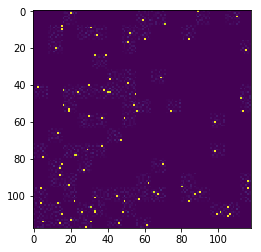

In [15]:
# First we load the data
#print((mnist.images[0]))
#mnist = datasets.load_digits()
#X,y = mnist.images,mnist.target
#X = X.reshape(len(X),-1)

images=[]

for file in glob.glob("tiles/*.jpg"):
    print(file.split("_"))
    #z=zip(cv2.imread(file, cv2.IMREAD_GRAYSCALE),file.split("_")[0])
    #images.append(z) #file, tile number, rotation
    images.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE)) #file, tile number, rotation

plt.imshow(images[2])

This digit is a 3


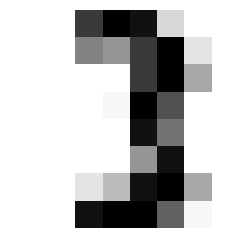

This digit is a 5


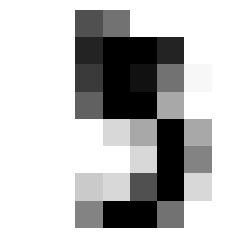

This digit is a 7


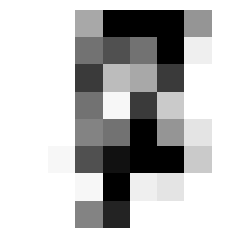

This digit is a 9


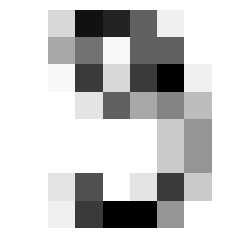

This digit is a 9


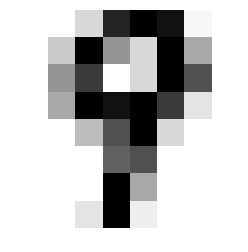

This digit is a 9


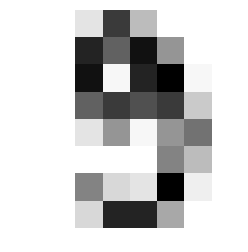

This digit is a 5


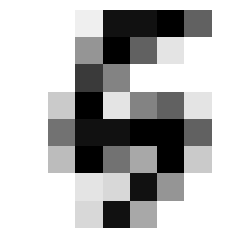

This digit is a 5


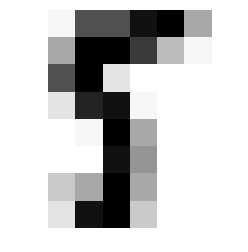

This digit is a 3


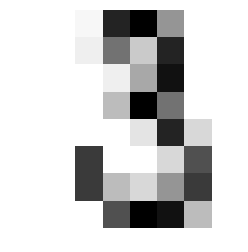

This digit is a 1


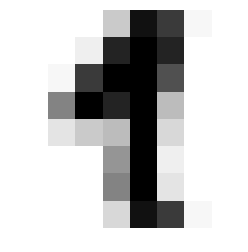

In [37]:
# Let's see what the data looks like
for idx in np.random.random(10)*len(X):
  print("This digit is a %d"%y[int(idx)])
  plt.imshow(mnist.images[int(idx)],"Greys")
  plt.axis('off')
  plt.show()

In [10]:
scalar = preprocessing.MinMaxScaler()
scalar.fit(X)
X_normalized=scalar.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y, test_size=0.33, random_state=42)


In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

predictions = clf.predict(X_test)

perc=0

for i in range(len(predictions)):
    if y_test[i]==predictions[i]:
        perc+=1

print("Test scored: "+repr(perc/float(len(predictions))))

Test scored: 0.968013468013468
